<a href="https://colab.research.google.com/github/swastikbanerjee/DAA/blob/main/SortingAlgos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import time
import random

Defining BubbleSort Function

In [17]:
def bubbleSort(a):
    n = len(a)
    for i in range(n):
        for j in range(0, n-i-1):
            if a[j] > a[j+1]:
                a[j], a[j+1] = a[j+1], a[j]

Defining InsertionSort Function

In [18]:
def insertionSort(a):
    for i in range(1, len(a)):
        k = a[i]
        j = i - 1
        while j >= 0 and k < a[j]:
            a[j + 1] = a[j]
            j -= 1
        a[j + 1] = k

Defining MergeSort Function

In [20]:
def mergeSort(a):
    if len(a) > 1:
        mid = len(a) // 2
        lh = a[:mid]
        rh = a[mid:]
        mergeSort(lh)
        mergeSort(rh)
        i = j = k = 0
        while i < len(lh) and j < len(rh):
            if lh[i] < rh[j]:
                a[k] = lh[i]
                i += 1
            else:
                a[k] = rh[j]
                j += 1
            k += 1
        while i < len(lh):
            a[k] = lh[i]
            i += 1
            k += 1
        while j < len(rh):
            a[k] = rh[j]
            j += 1
            k += 1

Defining SelectionSort Function

In [19]:
def selectionSort(a):
    for i in range(len(a)):
        min = i
        for j in range(i+1, len(a)):
            if a[j] < a[min]:
                min = j
        a[i], a[min] = a[min], a[i]

Defining QuickSort Function

In [21]:
def quickSort(a):
    if len(a) <= 1:
        return a
    else:
        p = a.pop()
        lp = []
        gp = []
        for ele in a:
            if ele <= p:
                lp.append(ele)
            else:
                gp.append(ele)
        return quickSort(lp) + [p] + quickSort(gp)

In [22]:
def RandArr(s):
    return [random.randint(1,9999) for i in range(s)]

In [23]:
def execTime(sortF, ipData):
    startTime = time.time()
    sortF(ipData.copy())
    endTime = time.time()
    return endTime - startTime

In [24]:
arrayLen = []
for i in range(100, 2100, 100):
    arrayLen.append(i)

In [25]:
sortF = {
    'BubbleSort': bubbleSort,
    'InsertionSort': insertionSort,
    'MergeSort': mergeSort,
    'SelectionSort': selectionSort,
    'QuickSort': quickSort
}

In [26]:
exec_Times = {alg: [] for alg in sortF.keys()}
for i in arrayLen:
    ipData = RandArr(i)
    for alg, sf in sortF.items():
        exec_Time = execTime(sf, ipData)
        exec_Times[alg].append(exec_Time)

In [28]:
def _round(a):
    c = -1
    for i in range(len(a)):
        a[i] = round(a[i],4)
    return a[::-1]

In [29]:
df = pd.DataFrame()
times = []
for a in exec_Times.keys():
    tdf = pd.DataFrame([[a,_round(exec_Times[a])]],columns=['Sorting Algorithm used','Execution time'])
    df = pd.concat([df,tdf])

Execution Times of all sorting algorithms in tabular form

In [30]:
df

,Sorting Algorithm used,Execution time
0,BubbleSort,"[0.3815, 0.3444, 0.3003, 0.2673, 0.2376, 0.217..."
0,InsertionSort,"[0.1923, 0.1635, 0.1465, 0.141, 0.1116, 0.1012..."
0,MergeSort,"[0.0074, 0.007, 0.0064, 0.006, 0.0056, 0.0052,..."
0,SelectionSort,"[0.1676, 0.1552, 0.1346, 0.1205, 0.1078, 0.095..."
0,QuickSort,"[0.0034, 0.0031, 0.003, 0.0027, 0.0026, 0.0023..."


The array of values for each sorting algorithms contain the execution times for array input size of 100 to 2000 with step of 100 in the reverse order.

Graphical Representation of Time Complexity of all sorting algorithms

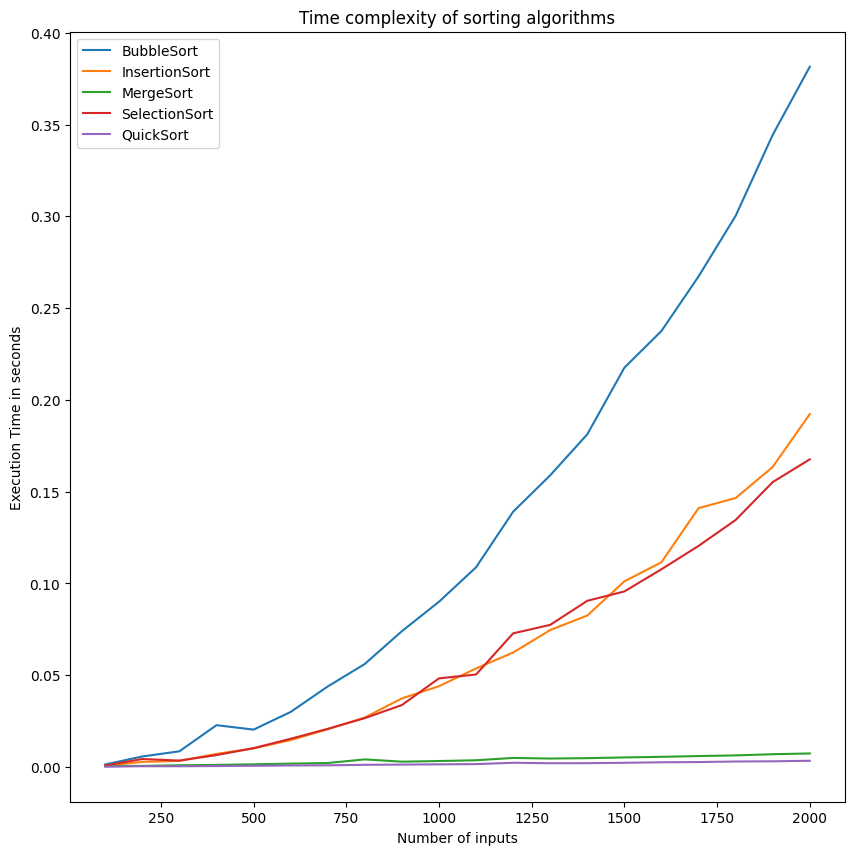

<Figure size 640x480 with 0 Axes>

In [27]:
plt.figure(figsize=(10, 10))
for alg, t in exec_Times.items():
    plt.plot(arrayLen, t, label=alg)
plt.title('Time complexity of sorting algorithms')
plt.xlabel('Number of inputs')
plt.ylabel('Execution Time in seconds')
plt.legend()
plt.show()
plt.tight_layout();

The nature of curve for Bubble Sort, Selection Sort and Insertion Sort with a time complexity of O(n^2) has been shown in the graph. For Merge and Quick Sort with a time complexity of 0(nlogn) we got a more low sloped curve that is almost equal to 0 second considering smaller number of inputs.

We can infer from the execution time table and the time complexity graph that Quick Sort was the fastest performing sorting algorithm while Bubble Sort was the slowest.